# Support vector machines

---------

## Linear Support vector machines

Support Vector Machines (SVM) are a powerful machine learning toolkit for classification and regression problems. We will explore their capabilities using the OpenML dataset about forged banknotes ([link](https://www.openml.org/d/1462)).

**a)** Import the dataset from OpenML by using the respective `scikit-learn` methods.

**b)** Visualize the features by converting them to a two-dimensional format with the help of t-SNE. Does this dataset appear to be suitable for linear SVM classification?

**c)** Split the data into a training set and a test set with a test ratio of 0.2.

**d)** Setup a `scikit-learn` pipeline that does the following:
1. Scale the features by using one of the feature scalers from `scikit-learn`. Which one did you choose and why?
2. Train a linear SVM classifier with the hyperparameters `C=1`, `max_iter=10000`, and hinge loss.

**e)** What is the performance of this classifier on the test set regarding accuracy and the confusion matrix? Also, compare it to the performance on the training set. Is overfitting or underfitting a problem?


In [1]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,precision_score, recall_score, f1_score
from sklearn import svm, tree
# a) load data
data = sklearn.datasets.fetch_openml(name='banknote-authentication')
X = pd.DataFrame(data=data.data, columns=data.feature_names)
y = pd.DataFrame(data=data.target, columns=data.target_names)
df = pd.concat([X, y], axis=1)

d:\Data science\Python materials\Machine learning\Machine-learning\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Data science\Python materials\Machine learning\Machine-learning\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


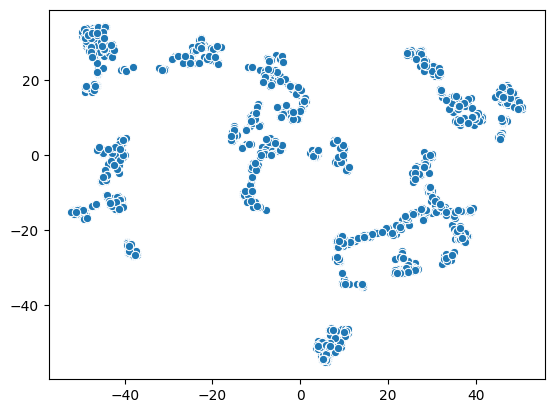

In [3]:
# b) Visualize the features
from sklearn.manifold import TSNE
X_tnse = TSNE(n_components=2).fit_transform(X)
sns.scatterplot(X_tnse[:,0],X_tnse[:,1])
plt.show()

The data can be splitted by a hyperplane -> suitable for SVM

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.LinearSVC(C=1, max_iter=10000, loss='hinge'))])
# Train the model
pipeline.fit(X_train, y_train)
# Predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Accuracy and confusion matrix
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Training Confusion Matrix:")
print(train_confusion)
print("Test Confusion Matrix:")
print(test_confusion)

Training Accuracy: 0.9845
Test Accuracy: 0.9818
Training Confusion Matrix:
[[597  17]
 [  0 483]]
Test Confusion Matrix:
[[145   3]
 [  2 125]]


No clear underfitting/overfitting because there are no big difference in Accuracy and Evluation metrics of training set and test set

---------------

## Non-linear Support Vector Machines

We will now look at non-linear SVMs that are capable of fitting more complex data. We use the breast cancer dataset ([link](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset)) for this.

**a)** Fetch the dataset. Split it into a training set and a test set with a test ratio of 0.2.

**b)** Build three `scikit-learn` pipelines (see below) that do the following:
1. Scale the features by using one of the feature scalers from `scikit-learn`. Which one did you choose and why?
2. Train an SVM classifier on the training data.

The three pipelines only vary in the way they classify:

- **Pipeline 1**: A linear SVM classifier with `C=1`, `max_iter=1000`, and a hinge loss that acts as a baseline (similar to the one from Exercise 1).

- **Pipeline 2**: A linear SVM classifier with the same parameter settings as Pipeline 1. In contrast to the first one, this classifier should work on polynomial features up to a degree of 3.

- **Pipeline 3**: An SVM classifier with a polynomial kernel (degree of 3), `C=1`, and `coef0=1`.

**c)** Compare the approaches in terms of accuracy on the test set. Explain the results.

**d)** Try to improve the results by performing a grid search with the best performing classifier. Keep the configuration that was used before and search for better parameter settings of `C` (range between 0.1 and 100) and `max_iter` (range between 100 and 10000). Use appropriate steps in the grid.


In [49]:
from sklearn.svm import SVC
# Load the dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Pipeline 1: Linear SVM
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('svm', SVC(C=1, max_iter=1000, kernel='linear'))  # Linear SVM
])
# Pipeline 2: Polynomial Features + Linear SVM
pipeline2 = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),  # Polynomial features
    ('scaler', StandardScaler()),  # Scaling features
    ('svm', SVC(C=1, max_iter=1000, kernel='linear'))  # Linear SVM
])

# Pipeline 3: Polynomial Kernel SVM
pipeline3 = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('svm', SVC(C=1, kernel='poly', degree=3, coef0=1))  # Polynomial kernel SVM
])
# Train and evaluate Pipeline 1
pipeline1.fit(X_train, y_train)
y_pred1 = pipeline1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)

# Train and evaluate Pipeline 2
pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)

# Train and evaluate Pipeline 3
pipeline3.fit(X_train, y_train)
y_pred3 = pipeline3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)

print(f"Pipeline 1 Accuracy: {accuracy1:.4f}")
print(f"Pipeline 2 Accuracy: {accuracy2:.4f}")
print(f"Pipeline 3 Accuracy: {accuracy3:.4f}")
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Range for C
    'svm__max_iter': [100, 1000, 5000, 10000]  # Range for max_iter
}

# Grid search on Pipeline 3
grid_search = GridSearchCV(pipeline3, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
best_pipeline = grid_search.best_estimator_
y_test_pred = best_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with Best Parameters: {test_accuracy:.4f}")


Pipeline 1 Accuracy: 0.9561
Pipeline 2 Accuracy: 0.9298
Pipeline 3 Accuracy: 0.9825
Best Parameters: {'svm__C': 1, 'svm__max_iter': 1000}
Best Score: 0.9802197802197803
Test Accuracy with Best Parameters: 0.9825


---------

## Visualizing Linear SVM

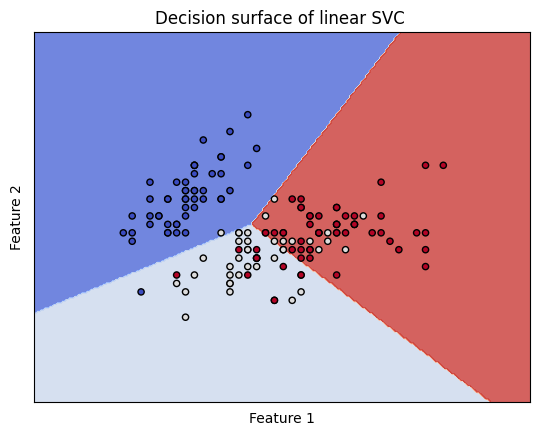

In [45]:
X_v = X[:, :2]  # we only take the first two features.

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.LinearSVC(C=1, max_iter=10000, loss='hinge'))])
# Train the model
pipeline.fit(X_v, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_v[:, 0], X_v[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pipeline, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Feature 2')
ax.set_xlabel('Feature 1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

## Visualizing Non-linear SVM

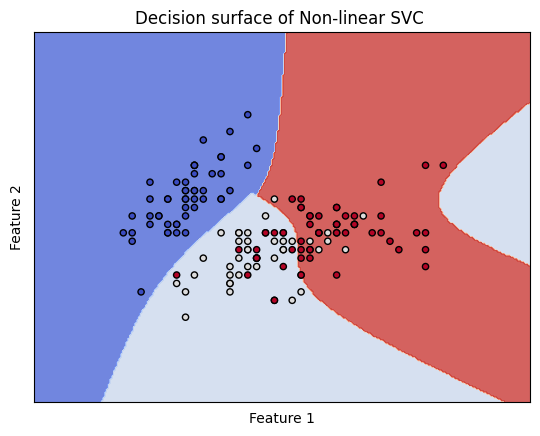

In [48]:
# Pipeline 3: Polynomial Kernel SVM
pipeline3 = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('svm', SVC(C=1, kernel='poly', degree=3, coef0=1))  # Polynomial kernel SVM
])
pipeline3.fit(X_v, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of Non-linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_v[:, 0], X_v[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pipeline3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Feature 2')
ax.set_xlabel('Feature 1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()